# Image Processing Task

| الفرقة   |   الرقم الأكاديمي   |   السكشن   |   الاسم   |
| -----------------: | -------: | -----------: | -----------------: |
|  الثالثة  |   2000011   |   1   |   أحمد إبراهيم حلمي عبدالدايم منتصر   |

Q) Apply a histogram to each image color channel, then increase the contrast, and after that reduce the brightness in all channels in any image you choose.



# Importing libraries

In [57]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Functions

Plotting two images side by side

In [58]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

Plotting two histograms side by side

In [59]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

## Reading the image

Image Shape: (427, 640, 3)


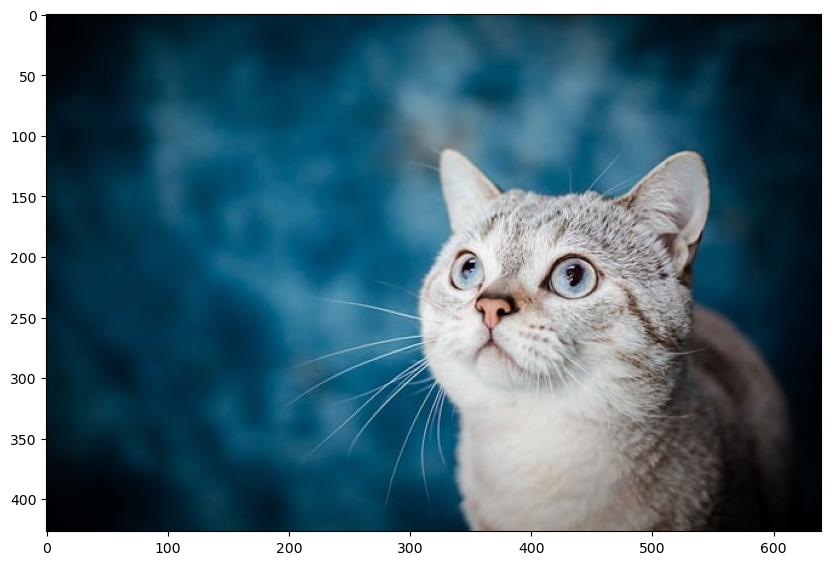

In [60]:
image = cv2.imread("cat.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
print("Image Shape:", image.shape)
plt.show()

## Histogram for the original image

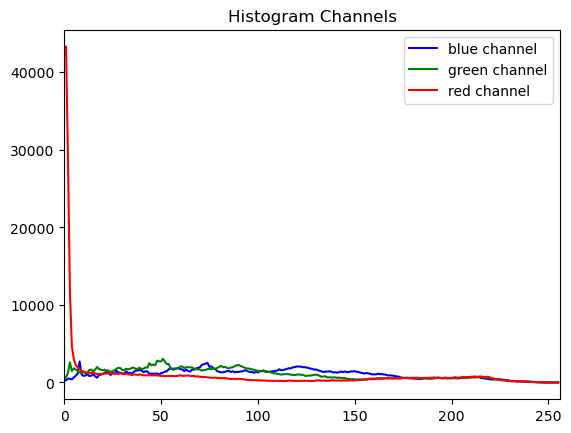

In [61]:
intensity_values=np.array([x for x in range(256)])
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")\
    
    plt.xlim([0,256])
    
plt.legend()
plt.title("Histogram Channels")
plt.show()

## Applying Pixel Transforms to all image channels

1. Increasing the contrast.
2. Reducing the brightness.


In [64]:
alpha = 1.5         # contrast control     (Increasing the contrast by 1.8)
beta = -50        # brightness control   (Reduction of brightness by 50)

brightness_image = cv2.convertScaleAbs(image, alpha=1, beta=beta)
contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=1)
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

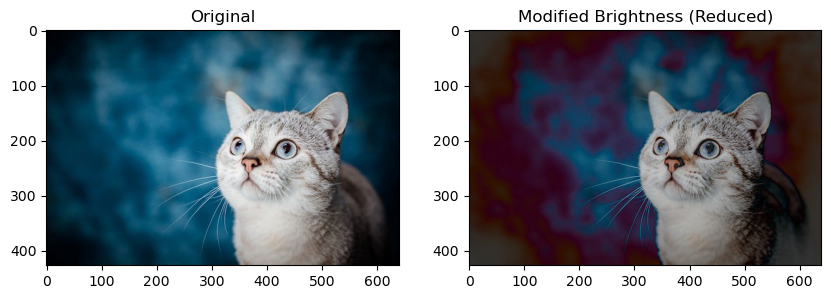

In [65]:
plot_image(image, brightness_image, "Original", "Modified Brightness (Reduced)")

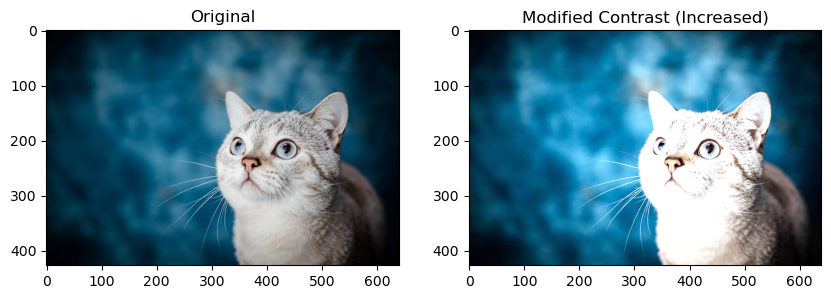

In [66]:
plot_image(image, contrast_image, "Original", "Modified Contrast (Increased)")

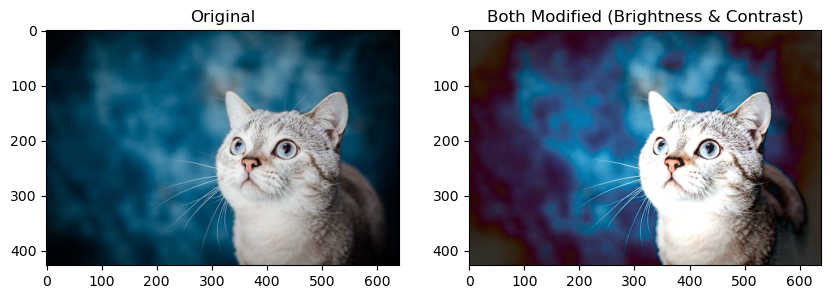

In [67]:
plot_image(image, new_image, "Original", "Both Modified (Brightness & Contrast)")

## Histogram for the image before and after modification

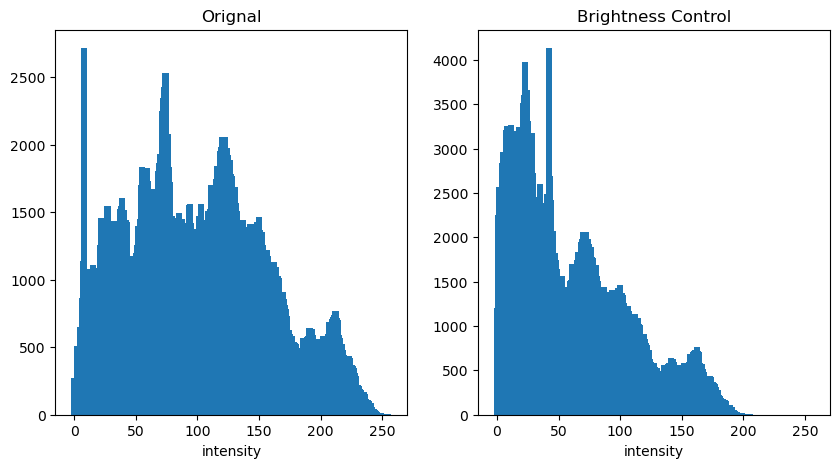

In [68]:
plt.figure(figsize=(10,5))
plot_hist(image, brightness_image, "Orignal", "Brightness Control")

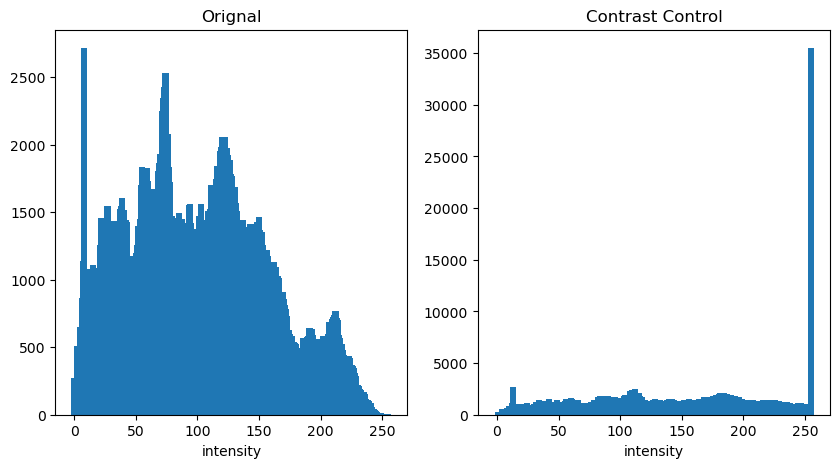

In [69]:
plt.figure(figsize=(10,5))
plot_hist(image, contrast_image, "Orignal", "Contrast Control")

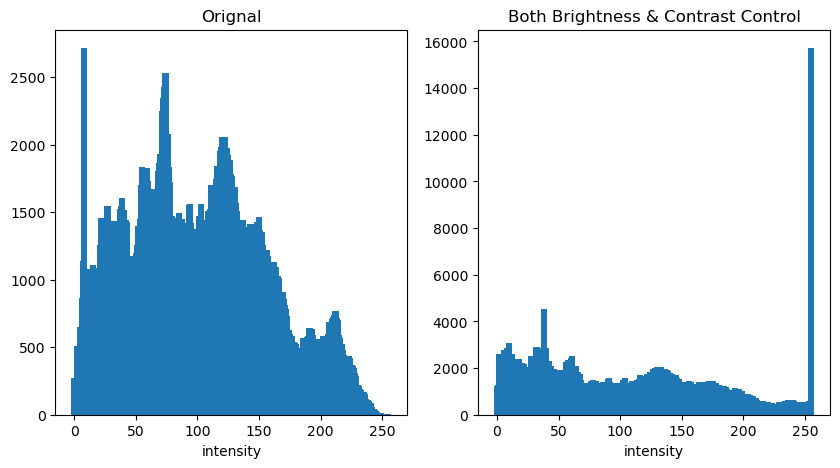

In [70]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Both Brightness & Contrast Control")